In [218]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [219]:
from sklearn.datasets import load_boston
boston = load_boston()
boston.keys()

C:\Users\Lenovo\.conda\envs\Python 2021\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California hou

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])

In [220]:
print(boston['DESCR'])   # descripción del dataset
# print(boston['data'])           # matriz con los datos de entrada (atributos)
# boston['target']         # vector de valores a predecir
# boston['feature_names']  # nombres de los atributos para cada columna de 'data'

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [221]:
print(boston['feature_names'])

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [222]:
features = boston['feature_names']
features = features.tolist()
features

['CRIM',
 'ZN',
 'INDUS',
 'CHAS',
 'NOX',
 'RM',
 'AGE',
 'DIS',
 'RAD',
 'TAX',
 'PTRATIO',
 'B',
 'LSTAT']

## División en Entrenamiento y Evaluación

Dividimos aleatoriamente los datos en 80% para entrenamiento y 20% para evaluación:

In [223]:
from sklearn.model_selection import train_test_split
X, y = boston['data'], boston['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=0)
X_train.shape, X_test.shape

((404, 13), (102, 13))

Ejercicio 2: Visualización de los Datos

Ejercicio 3: Regresión Lineal
Seleccione un solo atributo que considere puede ser el más apropiado.
Instancie una regresión lineal de scikit-learn, y entrénela usando sólo el atributo seleccionado.
Evalúe, calculando error cuadrático medio para los conjuntos de entrenamiento y evaluación.
Grafique el modelo resultante, junto con los puntos de entrenamiento y evaluación.
Interprete el resultado, haciendo algún comentario sobre las cualidades del modelo obtenido.

In [224]:
from sklearn.feature_selection import RFE
from sklearn.svm import SVR

In [225]:
estimator = SVR(kernel="linear")
selector_feature = RFE(estimator, n_features_to_select=1, step=1)
selector_feature = selector_feature.fit(X_train, y_train)

In [226]:
selector_feature.ranking_ #Ranking para elegir la mejor variable predictora para regresion lineal

array([ 7,  9,  8,  3,  2,  1, 10,  6, 12, 13,  4, 11,  5])

In [227]:
selector_feature.support_

array([False, False, False, False, False,  True, False, False, False,
       False, False, False, False])

In [228]:
for i in range(len(features)):
    if selector_feature.support_[i] == True:
        print("The feature {} is THE BEST fit for a lineal regresion model and its ranking is: {}\n".format(features[i], selector_feature.ranking_[i]))
    else:
        print("The feature {} is the NOT the best fit for a lineal regresion model and its ranking is: {}\n".format(features[i], selector_feature.ranking_[i]))
        

The feature CRIM is the NOT the best fit for a lineal regresion model and its ranking is: 7

The feature ZN is the NOT the best fit for a lineal regresion model and its ranking is: 9

The feature INDUS is the NOT the best fit for a lineal regresion model and its ranking is: 8

The feature CHAS is the NOT the best fit for a lineal regresion model and its ranking is: 3

The feature NOX is the NOT the best fit for a lineal regresion model and its ranking is: 2

The feature RM is THE BEST fit for a lineal regresion model and its ranking is: 1

The feature AGE is the NOT the best fit for a lineal regresion model and its ranking is: 10

The feature DIS is the NOT the best fit for a lineal regresion model and its ranking is: 6

The feature RAD is the NOT the best fit for a lineal regresion model and its ranking is: 12

The feature TAX is the NOT the best fit for a lineal regresion model and its ranking is: 13

The feature PTRATIO is the NOT the best fit for a lineal regresion model and its ra

Como pudimos observar tanto en los pltos como con el FeatureSelector de SkLearn, concluimos que la mejor variable para un modelo de regresion lineal es RM.

In [229]:
# Se selecciona el atributo 'RM'
feature = 'RM' 
selector = (boston['feature_names'] == feature)
X_train_rm = X_train[:, selector]
X_test_rm = X_test[:, selector]
X_train_rm.shape, X_test_rm.shape

((404, 1), (102, 1))

In [230]:
from sklearn.linear_model import LinearRegression

In [231]:
lm = LinearRegression()
lm.fit(X_train_rm, y_train)

LinearRegression()

In [232]:
y_train_predict = lm.predict(X_train_rm)
y_test_predict = lm.predict(X_test_rm)

In [233]:
SSD = np.sum((y_train - y_train_predict)**2)

In [234]:
square_error = np.sqrt(SSD/(len(X_train) - 2))
square_error

6.55999360902073

In [235]:
lm.coef_

array([9.37638431])

In [236]:
lm.intercept_

-36.47618962764734

In [269]:
#Estadistico r2 para ver la eficiencia del modelo:
lm.score(X_train_rm, y_train)

0.4970800097843844

In [237]:
from sklearn.metrics import mean_squared_error
test_error = mean_squared_error(y_pred_test, y_test, squared = False)
train_error = mean_squared_error(y_pred_train, y_train, squared = False)
test_error, train_error

(6.848894190115315, 6.543735855131036)

El modelo quedaria conformado como: MEDIAN VALUES = -36.47618962764734 + 9.37638431 * RM

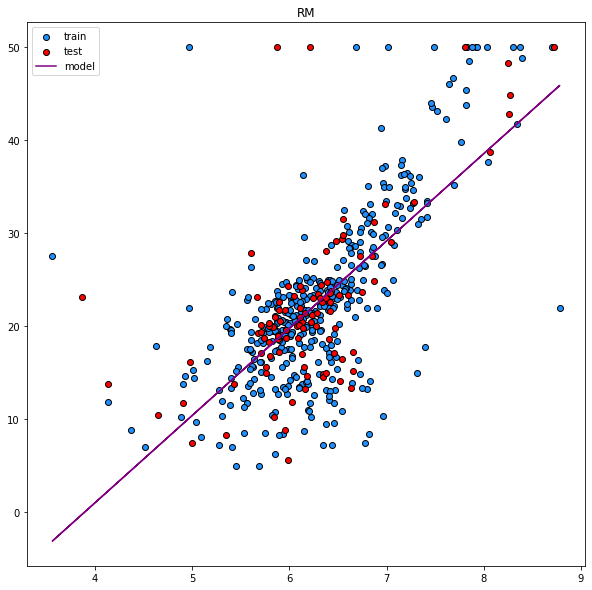

In [238]:
%matplotlib inline
plt.figure(figsize = (10,10))
plt.scatter(X_train_rm, y_train, facecolor="dodgerblue", edgecolor="k", label="train")
plt.scatter(X_test_rm, y_test, facecolor="red", edgecolor="k", label="test")
plt.plot(X_train_rm, y_train_predict, color="purple", label="model")
plt.title(feature)
plt.legend()
plt.show()

Ejercicio 4: Regresión Polinomial
En este ejercicio deben entrenar regresiones polinomiales de diferente complejidad, siempre usando scikit-learn.

Deben usar el mismo atributo seleccionado para el ejercicio anterior.

Para varios grados de polinomio, haga lo siguiente:

Instancie y entrene una regresión polinomial.
Prediga y calcule error en entrenamiento y evaluación. Imprima los valores.
Guarde los errores en una lista.
Grafique las curvas de error en términos del grado del polinomio.
Interprete la curva, identificando el punto en que comienza a haber sobreajuste, si lo hay.
Seleccione el modelo que mejor funcione, y grafique el modelo conjuntamente con los puntos.
Interprete el resultado, haciendo algún comentario sobre las cualidades del modelo obtenido.
Observación: Con algunos atributos se pueden obtener errores en test menores a 40 e incluso a 35.

In [239]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

In [240]:
pf = PolynomialFeatures(degree = 2)
lr = LinearRegression(fit_intercept= False)
model = make_pipeline(pf, lr)

In [241]:
model.fit(X_train_rm, y_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('linearregression', LinearRegression(fit_intercept=False))])

In [242]:
lr.coef_ #inspeccionamos los parametros.

array([ 68.20229886, -23.56509374,   2.56037958])

In [243]:
lr.intercept_

0.0

In [244]:
mean_squared_error(y_train, model.predict(X_train_rm), squared = False) #notamos que el error disminuye levemente con
#este modelo de regresion polinomial grado 2

6.143739005709898

In [245]:
X_train.shape, y_train.shape

((404, 13), (404,))

In [246]:
# plt.scatter(X_train_rm, y_train, facecolor="dodgerblue", edgecolor="k", label="train")
# plt.scatter(X_test_rm, y_test, facecolor="white", edgecolor="k", label="test")
# plt.plot(X[:,selector], model.predict(X[:,selector]), color="red", label="model")
# plt.legend()
# plt.show()
# Horrendo el grafico:

In [247]:
#buscando los errores del modelo de entrenamiento y validacion a medida que aumentamos los grados del polinomio
degrees = [1,2,3,4,5,6,7,8,9]
test_errors = []
train_errors = []

for degree in degrees:
    pf = PolynomialFeatures(degree)
    lr = LinearRegression(fit_intercept= False)
    model = make_pipeline(pf, lr)
    model.fit(X_train_rm, y_train)
    
    #estimadores:
    y_train_pred = model.predict(X_train_rm)
    y_test_pred = model.predict(X_test_rm)
    
    #errores:
    train_error = mean_squared_error(y_train, y_train_pred)
    test_error = mean_squared_error(y_test, y_test_pred)
    train_errors.append(train_error)
    test_errors.append(test_error)

In [248]:
train_errors, test_errors

([42.820478941727515,
  37.74552897028125,
  36.39565875767105,
  34.80844625691349,
  33.131121571954914,
  33.130116415579074,
  33.060358764657465,
  33.06035722561689,
  32.854885493706114],
 [46.907351627395315,
  39.79473116372663,
  39.825762088216536,
  41.55392567589451,
  41.03828856935067,
  41.00917696010345,
  42.39410829650169,
  42.399257253879284,
  46.05126028248193])

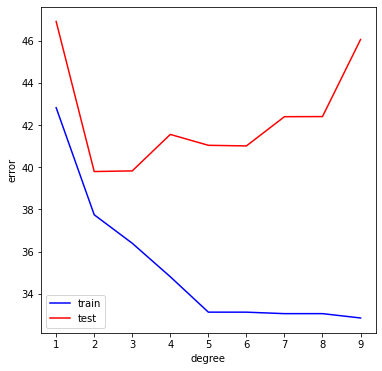

In [249]:
%matplotlib inline
plt.figure(figsize = (6,6))

plt.plot(degrees, train_errors, color="blue", label="train")
plt.plot(degrees, test_errors, color="red", label="test")
plt.legend()
plt.xlabel("degree")
plt.ylabel("error")
plt.show()

#polinomio de grado 3 parece ser el mejor. 

Ejercicio 5: Regresión con más de un Atributo
En este ejercicio deben entrenar regresiones que toman más de un atributo de entrada.

Seleccione dos o tres atributos entre los más relevantes encontrados en el ejercicio 2.
Repita el ejercicio anterior, pero usando los atributos seleccionados. No hace falta graficar el modelo final.
Interprete el resultado y compare con los ejercicios anteriores. ¿Se obtuvieron mejores modelos? ¿Porqué?

Se repetira el selector de features del ejercicio 2 para 3 atributos:

In [251]:
estimator = SVR(kernel="linear")
selector_feature = RFE(estimator, n_features_to_select=3, step=1)
selector_feature = selector_feature.fit(X_train, y_train)

In [252]:
selector_feature.ranking_

array([ 5,  7,  6,  1,  1,  1,  8,  4, 10, 11,  2,  9,  3])

In [254]:
selector_features.support_ #se observa que ningun feature se puede usar como relacion "linear"
#en teoria el error del modelo deberia ser mayor que con una sola variable

array([False, False, False, False, False,  True, False, False, False,
       False, False, False, False])

In [255]:
list(zip(features, selector_feature.ranking_))

[('CRIM', 5),
 ('ZN', 7),
 ('INDUS', 6),
 ('CHAS', 1),
 ('NOX', 1),
 ('RM', 1),
 ('AGE', 8),
 ('DIS', 4),
 ('RAD', 10),
 ('TAX', 11),
 ('PTRATIO', 2),
 ('B', 9),
 ('LSTAT', 3)]

In [272]:
# Se eligen 3 variables: RM, CHAS y NOX
selector2 = (boston['feature_names'] == 'RM') | (boston['feature_names'] == 'CHAS') | (boston['feature_names'] == 'NOX')
X_train_fs = X_train[:, selector2]
X_test_fs = X_test[:, selector2]
X_train_fs.shape, X_test_fs.shape

((404, 3), (102, 3))

In [273]:
lm2 = LinearRegression()
lm2.fit(X_train_fs, y_train)

LinearRegression()

In [274]:
lm2.coef_ #3 Coeficientes.

array([  4.41220226, -22.35623144,   8.07517922])

In [275]:
lm2.score(X_train_fs, y_train) #R2 aumenta respecto al modelo lineal con solo una variable. 

0.5777796687926771

In [280]:
train_error_lm2 = mean_squared_error(y_train, lm2.predict(X_train_fs), squared = False)
test_error_lm2 = mean_squared_error(y_test, lm2.predict(X_test_fs), squared = False)
print(test_error_lm2, train_error_lm2)

6.658519942458273 5.995782663922449


Errores del modelo lineal con 1 variable: 

(Test: 6.848894190115315,Train: 6.543735855131036)

Se puede concluir que la inclusion de variables al modelo, aumenta la informacion y por ende hace disminuir el error. Tal vez, por la NO relacion Lineal entra la variable a predecir y la variable predictora, el modelo no disminuye su error de manera significativa. 